In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [74]:
negsi_features_path = '../results/NegsiRNA_features.csv'
df_negsi = pd.read_csv(negsi_features_path, index_col=0)

In [75]:
df_ml = df_negsi.copy().fillna(0)
labels = {'NS': 0, 'NO': 1, 'CA': 2}
df_ml['label'] = df_ml.index.map(lambda x: labels[x[-2:]])

In [76]:
df_ml

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,j2j_distance_std,j2j_eu_distance_mean,j2j_eu_distance_std,j2j_distance_ratio_mean,j2j_distance_ratio_std,nodes_n,nodes_max,nodes_mean,nodes_std,label
NegsiRNA_C3c_CA,0.733850,0.461239,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,55.838049,64.151842,51.039731,0.928818,0.035266,1156,6,3.132353,0.368235,2
NegsiRNA_C3b_CA,0.581828,0.913848,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,35.628550,51.255141,32.524791,0.935073,0.032228,1830,5,3.121311,0.333116,2
NegsiRNA_E3_NO,0.583298,0.893483,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,446,...,35.494122,44.475891,32.458687,0.933285,0.033524,2187,5,3.139918,0.358568,1
NegsiRNA_L2_NS,0.690188,0.566952,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,46.097159,48.457418,41.626902,0.927437,0.041164,1639,5,3.153752,0.372363,0
NegsiRNA_L1_CA,0.623830,0.842740,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,34.425614,52.494589,31.461633,0.933604,0.033201,1913,5,3.125457,0.340574,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.747116,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,33.954309,50.942437,31.187113,0.932444,0.033376,2034,5,3.140118,0.351333,2
NegsiRNA_I3_NO,0.590003,0.861740,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,37.953111,47.953077,34.082777,0.929160,0.037500,1813,5,3.128516,0.339572,1
NegsiRNA_I2_CA,0.600133,0.941587,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507,...,32.399391,39.080209,29.337301,0.930631,0.049304,3025,6,3.161653,0.385674,2
NegsiRNA_H3_NS,0.608080,0.862938,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,39.278796,54.938723,35.721261,0.932738,0.034584,1564,5,3.116368,0.322654,0


In [77]:
y = df_ml['label']
y.shape

(102,)

In [78]:
X = df_ml.drop('label', axis=1).to_numpy()
X.shape

(102, 27)

In [79]:
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       1.00      0.75      0.86         8
           2       0.71      0.56      0.63         9

    accuracy                           0.69        26
   macro avg       0.75      0.69      0.71        26
weighted avg       0.74      0.69      0.70        26



In [82]:
cm = confusion_matrix(y_test, preds)
labels_show =  ['NS', 'NO', 'CA']
df_cm = pd.DataFrame(cm, index=labels_show, columns=labels_show)
print(df_cm.head())

    NS  NO  CA
NS   7   0   2
NO   2   6   0
CA   4   0   5


Text(83.40000000000006, 0.5, 'Real labels')

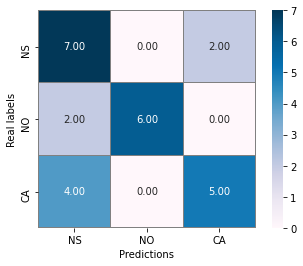

In [83]:
ax = sns.heatmap(df_cm, square=True, cmap='PuBu', fmt='.2f', annot=True, linewidths=0.1, linecolor='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real labels')


In [84]:
cm_n = cm / cm.sum(axis=1)[:, np.newaxis] # normalización
df_cm_n = pd.DataFrame(cm_n, index=labels_show, columns=labels_show)
print(df_cm_n.head())

          NS    NO        CA
NS  0.777778  0.00  0.222222
NO  0.250000  0.75  0.000000
CA  0.444444  0.00  0.555556


Text(83.40000000000006, 0.5, 'Real labels')

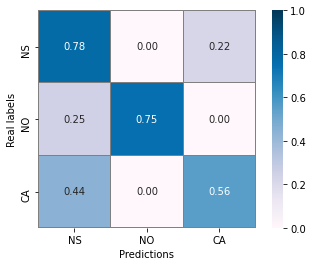

In [86]:
ax = sns.heatmap(df_cm_n, square=True, cmap='PuBu', fmt='.2f', annot=True, vmin=0, vmax=1, linewidths=0.1, linecolor='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Real labels')